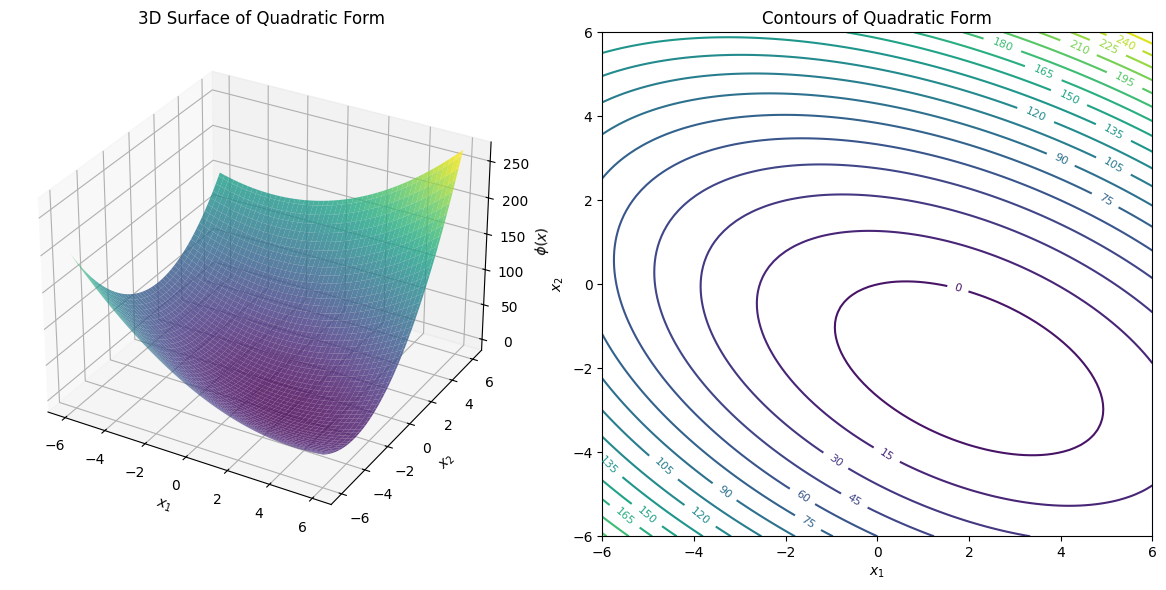

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def quadratic_form(x, A, b):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

def plot_quadratic_form(A, b):
    x1 = np.linspace(-6, 6, 100)
    x2 = np.linspace(-6, 6, 100)
    X1, X2 = np.meshgrid(x1, x2)

    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            x = np.array([X1[i, j], X2[i, j]])
            Z[i, j] = quadratic_form(x, A, b)

    fig = plt.figure(figsize=(12, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
    ax1.set_title('3D Surface of Quadratic Form')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$')
    ax1.set_zlabel('$\\phi(x)$')

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X1, X2, Z, levels=20)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.set_title('Contours of Quadratic Form')
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')

    plt.tight_layout()
    plt.show()

# Example usage:
A = np.array([[3,2],[2,6]])
b = np.array([2,-8])
plot_quadratic_form(A, b)


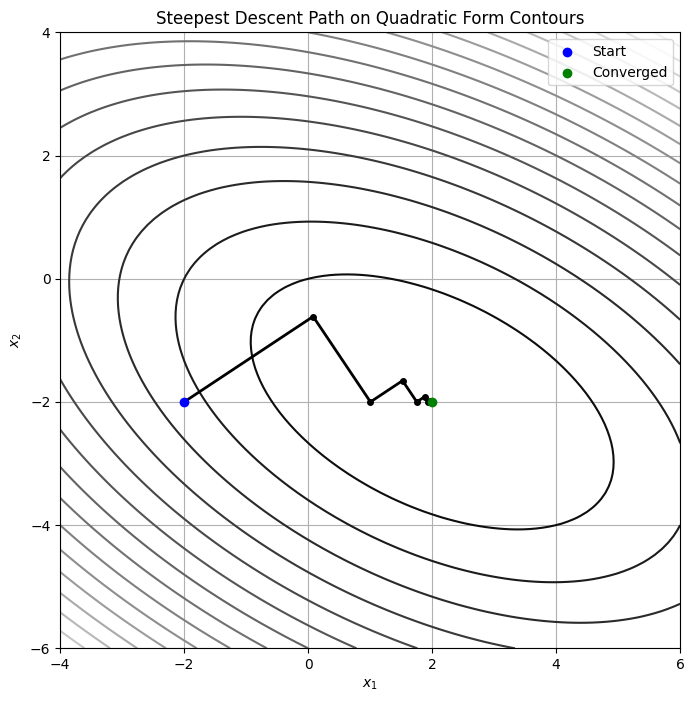

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic form definition
def phi(x, A, b):
    return 0.5 * x.T @ A @ x - b.T @ x

# Gradient of the quadratic form
def grad_phi(x, A, b):
    return A @ x - b

# Steepest descent with exact line search
def steepest_descent(A, b, x0, tol=1e-8, max_iter=20):
    x = x0.copy()
    xs = [x.copy()]
    for i in range(max_iter):
        r = b - A @ x
        if np.linalg.norm(r) < tol:
            break
        alpha = (r.T @ r) / (r.T @ A @ r)
        x = x + alpha * r
        xs.append(x.copy())
    return np.array(xs)

# Example parameters
A = np.array([[3,2],[2,6]])
b = np.array([2,-8])
x0 = np.array([-2.0, -2.0])

# Run steepest descent
points = steepest_descent(A, b, x0)

# Prepare contour plot
x1 = np.linspace(-4, 6, 100)
x2 = np.linspace(-6, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x_vec = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = phi(x_vec, A, b)

# Plot contours and the path
plt.figure(figsize=(8, 8))
plt.contour(X1, X2, Z, levels=20, cmap='gray')
plt.plot(points[:, 0], points[:, 1], 'k.-', linewidth=2, markersize=8)
plt.scatter(points[0, 0], points[0, 1], color='blue', label='Start', zorder=5)
plt.scatter(points[-1, 0], points[-1, 1], color='green', label='Converged', zorder=5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Steepest Descent Path on Quadratic Form Contours')
plt.legend()
plt.grid(True)
plt.show()


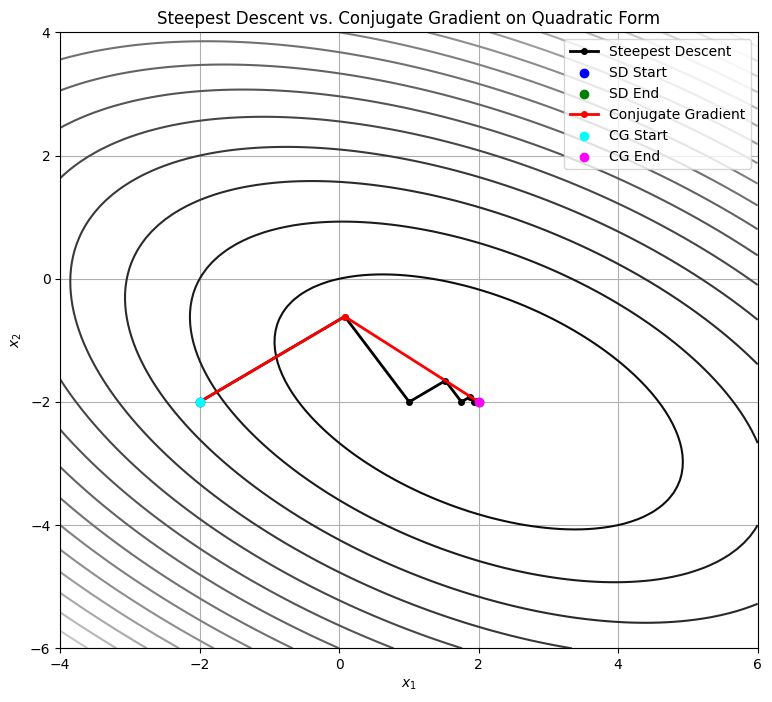

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic form and gradient
def phi(x, A, b):
    return 0.5 * x.T @ A @ x - b.T @ x

def grad_phi(x, A, b):
    return A @ x - b

# Steepest Descent method
def steepest_descent(A, b, x0, tol=1e-8, max_iter=20):
    x = x0.copy()
    xs = [x.copy()]
    for _ in range(max_iter):
        r = b - A @ x
        if np.linalg.norm(r) < tol:
            break
        alpha = (r.T @ r) / (r.T @ A @ r)
        x = x + alpha * r
        xs.append(x.copy())
    return np.array(xs)

# Conjugate Gradient method
def conjugate_gradient(A, b, x0, tol=1e-8, max_iter=20):
    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    xs = [x.copy()]
    for _ in range(max_iter):
        Ap = A @ p
        alpha = (r.T @ r) / (p.T @ Ap)
        x = x + alpha * p
        xs.append(x.copy())
        r_new = r - alpha * Ap
        if np.linalg.norm(r_new) < tol:
            break
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p
        r = r_new
    return np.array(xs)

# Problem setup
A = np.array([[3,2],[2,6]])
b = np.array([2,-8])
x0 = np.array([-2.0, -2.0])

# Run both methods
points_sd = steepest_descent(A, b, x0)
points_cg = conjugate_gradient(A, b, x0)

# Prepare contour plot
x1 = np.linspace(-4, 6, 100)
x2 = np.linspace(-6, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x_vec = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = phi(x_vec, A, b)

# Plot contours and both paths
plt.figure(figsize=(9, 8))
plt.contour(X1, X2, Z, levels=20, cmap='gray')

# Steepest Descent path
plt.plot(points_sd[:, 0], points_sd[:, 1], 'k.-', linewidth=2, markersize=8, label='Steepest Descent')
plt.scatter(points_sd[0, 0], points_sd[0, 1], color='blue', label='SD Start', zorder=5)
plt.scatter(points_sd[-1, 0], points_sd[-1, 1], color='green', label='SD End', zorder=5)

# Conjugate Gradient path
plt.plot(points_cg[:, 0], points_cg[:, 1], 'r.-', linewidth=2, markersize=8, label='Conjugate Gradient')
plt.scatter(points_cg[0, 0], points_cg[0, 1], color='cyan', label='CG Start', zorder=5)
plt.scatter(points_cg[-1, 0], points_cg[-1, 1], color='magenta', label='CG End', zorder=5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Steepest Descent vs. Conjugate Gradient on Quadratic Form')
plt.legend()
plt.grid(True)
plt.show()


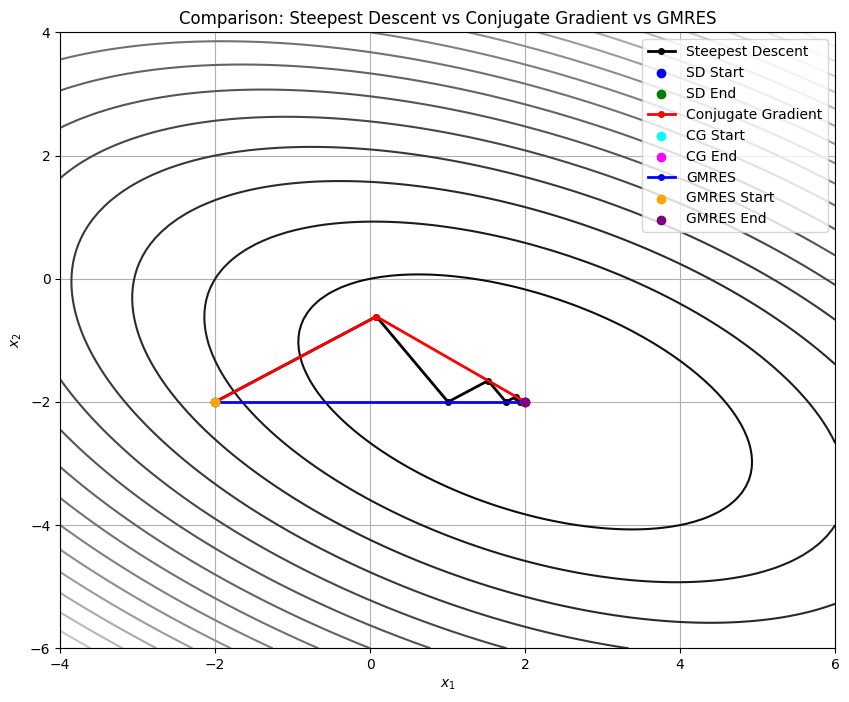

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import gmres

# Quadratic form
def phi(x, A, b):
    return 0.5 * x.T @ A @ x - b.T @ x

# Steepest Descent
def steepest_descent(A, b, x0, tol=1e-8, max_iter=20):
    x = x0.copy()
    xs = [x.copy()]
    for _ in range(max_iter):
        r = b - A @ x
        if np.linalg.norm(r) < tol:
            break
        alpha = (r.T @ r) / (r.T @ A @ r)
        x = x + alpha * r
        xs.append(x.copy())
    return np.array(xs)

# Conjugate Gradient
def conjugate_gradient(A, b, x0, tol=1e-8, max_iter=20):
    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    xs = [x.copy()]
    for _ in range(max_iter):
        Ap = A @ p
        alpha = (r.T @ r) / (p.T @ Ap)
        x = x + alpha * p
        xs.append(x.copy())
        r_new = r - alpha * Ap
        if np.linalg.norm(r_new) < tol:
            break
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p
        r = r_new
    return np.array(xs)

# GMRES with solution path tracking
def gmres_method(A, b, x0, rtol=1e-8, max_iter=20):
    xs = [x0.copy()]
    def callback(xk):
        xs.append(xk.copy())
    gmres(
        A, b, x0=x0, rtol=rtol, maxiter=max_iter,
        callback=callback, restart=None,
        callback_type='x'  # This ensures callback receives solution vector
    )
    return np.array(xs)

# Problem setup
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])
x0 = np.array([-2.0, -2.0])

# Run all methods
points_sd = steepest_descent(A, b, x0)
points_cg = conjugate_gradient(A, b, x0)
points_gmres = gmres_method(A, b, x0)

# Prepare contour plot
x1 = np.linspace(-4, 6, 100)
x2 = np.linspace(-6, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x_vec = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = phi(x_vec, A, b)

# Plot contours and all paths
plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=20, cmap='gray')

# Steepest Descent path
plt.plot(points_sd[:, 0], points_sd[:, 1], 'k.-', linewidth=2, markersize=8, label='Steepest Descent')
plt.scatter(points_sd[0, 0], points_sd[0, 1], color='blue', label='SD Start', zorder=5)
plt.scatter(points_sd[-1, 0], points_sd[-1, 1], color='green', label='SD End', zorder=5)

# Conjugate Gradient path
plt.plot(points_cg[:, 0], points_cg[:, 1], 'r.-', linewidth=2, markersize=8, label='Conjugate Gradient')
plt.scatter(points_cg[0, 0], points_cg[0, 1], color='cyan', label='CG Start', zorder=5)
plt.scatter(points_cg[-1, 0], points_cg[-1, 1], color='magenta', label='CG End', zorder=5)

# GMRES path
plt.plot(points_gmres[:, 0], points_gmres[:, 1], 'b.-', linewidth=2, markersize=8, label='GMRES')
plt.scatter(points_gmres[0, 0], points_gmres[0, 1], color='orange', label='GMRES Start', zorder=5)
plt.scatter(points_gmres[-1, 0], points_gmres[-1, 1], color='purple', label='GMRES End', zorder=5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Comparison: Steepest Descent vs Conjugate Gradient vs GMRES')
plt.legend()
plt.grid(True)
plt.show()
